#                                         Honours Project - Fake News Detection

In [3]:
"""
Code to add/ commit/ push repository to github from cmd
git code:
git add .
git commit -m "First commit"
git push origin master
"""

'\nCode to add/ commit/ push repository to github from cmd\ngit code:\ngit add .\ngit commit -m "First commit"\ngit push origin master\n'

This project will be using the approach of CRISP-DM (Cross-industry standard process for data mining), which is a widely used process for knowledge discovery in data sets. 
The process encompasses several phases:

    1. Business Understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment

## Step 1 - Business Understanding

Goals/ Objectives:
1. sucessfully create a piece of software that is able to identify fake news
2. model's accuracy to be around the same or better than others
3. model to help answering the author's research questions

Success Criteria:
1. Is the software able to identify fake news with a high accuracy, precision, recall?
2. Is the software more effective in identifying fake news than humans?
3. No errors, bugs etc in the code

## Step 2 - Data Understanding

### 2 a) - Importing Libraries

In [4]:
#PREREQUISITES
#   -Anaconda (version Python 3.7) -> for jupyter notebook
#    see https://www.anaconda.com/distribution/
########################################################

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\SAIF
[nltk_data]     NOOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAIF
[nltk_data]     NOOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SAIF
[nltk_data]     NOOR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import string
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 2 b) - Loading the Data Set

In [6]:
df = pd.read_csv("data/FakeNews-(balanced)/fake_or_real_news.csv", encoding="utf-8")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#title of the article below
df.iloc[16,1]

'Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters'

In [8]:
#preview of a FAKE article
df.iloc[16,2]

'Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters First lady claims moral high ground while befriending rape-glorifying rappers Infowars.com - October 27, 2016 Comments \nAlex Jones breaks down the complete hypocrisy of Michele Obama and Hillary Clinton attacking Trump for comments he made over a decade ago while The White House is hosting and promoting rappers who boast about date raping women and selling drugs in their music. \nRappers who have been welcomed to the White House by the Obama’s include “Rick Ross,” who promotes drugging and raping woman in his song “U.O.N.E.O.” \nWhile attacking Trump as a sexual predator, Michelle and Hillary have further mainstreamed the degradation of women through their support of so-called musicians who attempt to normalize rape. NEWSLETTER SIGN UP Get the latest breaking news & specials from Alex Jones and the Infowars Crew. Related Articles'

In [9]:
#title of the article below
df.iloc[8,1]

"Fact check: Trump and Clinton at the 'commander-in-chief' forum"

In [10]:
#preview of a REAL article
df.iloc[8,2]

'Hillary Clinton and Donald Trump made some inaccurate claims during an NBC “commander-in-chief” forum on military and veterans issues:\n\n• Clinton wrongly claimed Trump supported the war in Iraq after it started, while Trump was wrong, once again, in saying he was against the war before it started.\n\n•\xa0Trump said that President Obama set a “certain date” for withdrawing troops from Iraq, when that date was set before Obama was sworn in.\n\n•\xa0Trump said that Obama’s visits to China, Saudi Arabia and Cuba were “the first time in the history, the storied history of Air Force One” when “high officials” of a host country did not appear to greet the president. Not true.\n\n•\xa0Clinton said that Trump supports privatizing the Veterans Health Administration. That’s false. Trump said he supports allowing veterans to seek care at either public or private hospitals.\n\n•\xa0Trump said Clinton made “a terrible mistake on Libya” when she was secretary of State. But, at the time, Trump als

In [11]:
df.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell

In [12]:
columns = df.columns.tolist()

In [13]:
print(columns)

['Unnamed: 0', 'title', 'text', 'label']


In [14]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

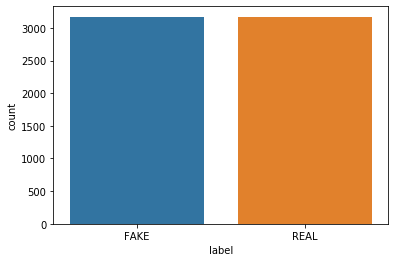

In [15]:
sns.countplot(df['label']) 

The data set seems to be well balanced.

In [16]:
type(df["title"])

pandas.core.series.Series

In [17]:
type(df["text"])

pandas.core.series.Series

In [18]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

It appears that "Unnamed: 0" is the index since it only contains numbers. The column will be checked for duplicates to check.

In [19]:
print(any(df["Unnamed: 0"].duplicated()))

False


In [20]:
df.isnull().values.any()

False

## Step 3 - Data Preparation

### 3 a) - General Polishing

In [21]:
#rename "Unnamed: 0" and make it the index of the data frame
df.columns = ["index", "title", "text", "label"]
df.set_index("index", inplace=True)

In [22]:
df.head()

,title,text,label
index,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [23]:
#order by index
df.sort_index(inplace=True)

In [24]:
df.head()

,title,text,label
index,,,
2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,REAL
7,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,REAL


In [25]:
df.index

Int64Index([    2,     3,     5,     6,     7,     9,    10,    12,    14,
               16,
            ...
            10543, 10545, 10546, 10547, 10548, 10549, 10551, 10553, 10555,
            10557],
           dtype='int64', name='index', length=6335)

The index seems to skip some numbers, for example 8 and 11. The index will be properly assigned.

In [26]:
df['index'] = df.reset_index().index

In [27]:
df.set_index("index", inplace=True)
df.head()

,title,text,label
index,,,
0,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
1,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
2,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
3,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,REAL
4,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,REAL


It appears that the data contains several characters like \n or \a. They will be removed from the data set.

### 3 b) - Normalising The Data

In [28]:
# the function strip() will be used to remove those characters
# Example:
s = "\n \a abc \n \n"
print(s.strip())

 abc


In [29]:
s = "\n\nCar"
print(s.strip())

Car


In [30]:
df["text"] = df["text"].apply(lambda x: x.strip())

In [31]:
# since some characters are part of the string, they have to be removed with the replace function
df["text"] = df["text"].apply(lambda x: x.replace("\n", ""))
df["text"] = df["text"].apply(lambda x: x.replace("\t", ""))
#df["text"] = df["text"].apply(lambda x: x.replace("\x", ""))
df["text"] = df["text"].apply(lambda x: x.replace("\xa0", ""))

df["title"] = df["title"].apply(lambda x: x.replace("\n", ""))
df["title"] = df["title"].apply(lambda x: x.replace("\t", ""))
#df["title"] = df["title"].apply(lambda x: x.replace("\x", ""))
df["title"] = df["title"].apply(lambda x: x.replace("\xa0", ""))

In [32]:
df.head()

,title,text,label
index,,,
0,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
1,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
2,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
3,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.Carly F...,REAL
4,Obama Argues Against Goverment Shutdown Over P...,President Barack ObamasaidSaturday night that ...,REAL


The next step is to remove punctuation.

In [33]:
#df["text"] = df["text"].apply(lambda x: x.replace(string.punctuation, ""))
#df["title"] = df["title"].apply(lambda x: x.replace(string.punctuation, ""))

df["title"] = df["title"].str.replace("[{}]".format(string.punctuation), "")
df["text"] = df["text"].str.replace("[{}]".format(string.punctuation), "")

In [34]:
#convert every word to lower case - normalising case
df["title"] = df["title"].str.lower()
df["text"] = df["text"].str.lower()
df["label"] = df["label"].str.lower()

In [35]:
df.head()

,title,text,label
index,,,
0,study women had to drive 4 times farther after...,ever since texas laws closed about half of the...,real
1,trump clinton clash in dueling dc speeches,donald trump and hillary clinton now at the st...,real
2,as reproductive rights hang in the balance deb...,washington fortythree years after the supreme...,real
3,despite constant debate americans abortion opi...,its been a big week for abortion newscarly fio...,real
4,obama argues against goverment shutdown over p...,president barack obamasaidsaturday night that ...,real


Additionally the labels will be converted to binary values: 0 and 1.

In [36]:
#df["label"] = df["label"].apply(lambda x: x.replace("real", 0))
#df["label"] = df["label"].apply(lambda x: x.replace("fake", 1))

df["label"] = df["label"].replace(to_replace=["real", "fake"], value=[0, 1])

In [37]:
df.head()

,title,text,label
index,,,
0,study women had to drive 4 times farther after...,ever since texas laws closed about half of the...,0
1,trump clinton clash in dueling dc speeches,donald trump and hillary clinton now at the st...,0
2,as reproductive rights hang in the balance deb...,washington fortythree years after the supreme...,0
3,despite constant debate americans abortion opi...,its been a big week for abortion newscarly fio...,0
4,obama argues against goverment shutdown over p...,president barack obamasaidsaturday night that ...,0


In the next step stopwords such as "the" or "a" will be removed since they do not contribute to a deeper meaning of a sentence.

In [38]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
from nltk.tokenize import word_tokenize
import string

#function that tokenises words and removes stop words, punctuation and non alphanumerical characters in a sentence
def func_normalise(sentence):
    tokens = word_tokenize(sentence)
    #print(tokens)
    stop_words = set(stopwords.words("english"))
    stop_words.add("n't")
    stop_words.add("nt")
    stop_words.add("u")
    
    table = str.maketrans("", "", string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    words = [word for word in stripped if word.isalpha()]
    
    new_sentence = [w for w in words if not w in stop_words] 
            
    new_sentence_str = " ".join(new_sentence)
    
    return new_sentence_str

In [40]:
#testing the function
func_normalise("ever ? since hasn't the / texa*s laws closed about half of the where didn't")

'ever since texas laws closed half'

Now the above function will be applied to the data in order to normalise it.

In [41]:
df["title"] = df["title"].apply(func_normalise)

In [42]:
df["text"] = df["text"].apply(func_normalise)

In [43]:
df.head()

,title,text,label
index,,,
0,study women drive times farther texas laws clo...,ever since texas laws closed half states abort...,0
1,trump clinton clash dueling dc speeches,donald trump hillary clinton starting line gen...,0
2,reproductive rights hang balance debate modera...,washington fortythree years supreme court esta...,0
3,despite constant debate americans abortion opi...,big week abortion newscarly fiorinas passionat...,0
4,obama argues goverment shutdown planned parent...,president barack obamasaidsaturday night congr...,0


As seen in the above example the text data has been (successfully) normalised.

### 3 c) - Stemming 

Stemming is the process of reducing words to their root. For example, "playing" and "played" reduce to the stem "play". Therefore stemming helps with reducing the vocabulary and allows to focus on the sense of a sentence.

In [44]:
#from nltk.stem.porter import PorterStemmer
#according to the nltk website the snowballstemmer is better than the "original" porter stemmer
#https://www.nltk.org/howto/stem.html

from nltk.stem.snowball import SnowballStemmer

#function that stems words in a sentence
def func_stem(sentence):
    tokens = word_tokenize(sentence)
    snowball_stemmer = SnowballStemmer("english")
    stemmed_sentence = [snowball_stemmer.stem(word) for word in tokens]
    stemmed_sentence_str = " ".join(stemmed_sentence)
    return stemmed_sentence_str

In [45]:
#test
func_stem("playing player play played plays")

'play player play play play'

In [46]:
df["title"] = df["title"].apply(func_stem)

In [47]:
df["text"] = df["text"].apply(func_stem)

In [48]:
df.head()

,title,text,label
index,,,
0,studi women drive time farther texa law close ...,ever sinc texa law close half state abort clin...,0
1,trump clinton clash duel dc speech,donald trump hillari clinton start line genera...,0
2,reproduct right hang balanc debat moder drop ball,washington fortythre year suprem court establi...,0
3,despit constant debat american abort opinion r...,big week abort newscar fiorina passion inaccur...,0
4,obama argu gover shutdown plan parenthood,presid barack obamasaidsaturday night congress...,0


### 3 d) - Lemmatising

According to literature lemmatising and stemming words is similar. However, stemming tries to cut off endings of words whereas lemmatising compares them to other words. To test whether lemmatising makes a difference in accuracy it will be implemented.

In [49]:
"""
import nltk
nltk.download('wordnet')
"""

def func_lemmatise(sentence):
    tokens = word_tokenize(sentence)
    lemmatiser = nltk.WordNetLemmatizer()
    lemmatised_sentence = [lemmatiser.lemmatize(word) for word in tokens]
    lemmatised_sentence_str = " ".join(lemmatised_sentence)
    return lemmatised_sentence_str

In [50]:
#test
func_lemmatise("playing player play played plays")

'playing player play played play'

In [51]:
df["title"] = df["title"].apply(func_lemmatise)

In [52]:
df["text"] = df["text"].apply(func_lemmatise)

In [53]:
df.head()

,title,text,label
index,,,
0,studi woman drive time farther texa law close ...,ever sinc texa law close half state abort clin...,0
1,trump clinton clash duel dc speech,donald trump hillari clinton start line genera...,0
2,reproduct right hang balanc debat moder drop ball,washington fortythre year suprem court establi...,0
3,despit constant debat american abort opinion r...,big week abort newscar fiorina passion inaccur...,0
4,obama argu gover shutdown plan parenthood,presid barack obamasaidsaturday night congress...,0


Six articles are going to be removed since they are part of the survey and because the model should make a prediction on these without being previously biased.

In [54]:
# 5099 	smell hillari fear 	daniel greenfield shillman journal fellow free... 	1
# 4988 	poll find american support polic highest near ... 	past year american seen polic offic ambush ass... 	1
# 534 	battl new york primari matter 	primari day new york frontrunn hillari clinton... 	0
# 4777 	uk announc new troop deploy near russia border 	militari british defens secretari michael fall... 	1
# 2734 	russia join franc strike isi stronghold syria 	russian militari might join french warplan tue... 	0
# 2058 	shortag lethal inject drug put death penalti s... 	suprem court mondaydecid oklahoma may continu ... 	0

# find a row
#df[df['title'].str.contains("lethal inj")]

# del a row
df.drop(index=5099, inplace=True)
df.drop(index=4988, inplace=True)
df.drop(index=534, inplace=True)
df.drop(index=4777, inplace=True)
df.drop(index=2734, inplace=True)
df.drop(index=2058, inplace=True)

In [55]:
#assign index anew
df['index'] = df.reset_index().index
df.set_index("index", inplace=True)
df.head()

,title,text,label
index,,,
0,studi woman drive time farther texa law close ...,ever sinc texa law close half state abort clin...,0
1,trump clinton clash duel dc speech,donald trump hillari clinton start line genera...,0
2,reproduct right hang balanc debat moder drop ball,washington fortythre year suprem court establi...,0
3,despit constant debat american abort opinion r...,big week abort newscar fiorina passion inaccur...,0
4,obama argu gover shutdown plan parenthood,presid barack obamasaidsaturday night congress...,0


### 3 e) - TF-IDF 

Since ML algorithms require numerical data as input instead of text, the text will be vectorised using the TF-IDF method, which stands for term frequency - inverse document frequency. TF-IDF is measure of orginiality of a word by comparing the number of times a word appears in a doc with the number of docs the words appears in.

In [56]:
df["title"] = df["title"].replace("[^a-zA-Z0-9 ]", "", regex=True)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.7)
feature_matrix = tfidf.fit_transform(df["title"])

In [58]:
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
tfidf.get_feature_names()

['aap',
 'abandon',
 'abbi',
 'abc',
 'abcwapo',
 'abduct',
 'abdullah',
 'abedin',
 'abil',
 'abl',
 'abnorm',
 'aboard',
 'abolish',
 'abort',
 'abortionrevers',
 'abridg',
 'abroad',
 'abrog',
 'absenc',
 'absente',
 'absolut',
 'abstain',
 'absurd',
 'abu',
 'abus',
 'abyss',
 'aca',
 'accept',
 'access',
 'accid',
 'accident',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accus',
 'acela',
 'acheron',
 'achiev',
 'ackbar',
 'acknowledg',
 'aclu',
 'acquir',
 'acquisit',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'acupunctur',
 'ad',
 'adam',
 'adapt',
 'add',
 'adderal',
 'addict',
 'addictionher',
 'address',
 'adelson',
 'adequ',
 'adhd',
 'adhm',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'ador',
 'adpr',
 'adpresnet',
 'adult',
 'advanc',
 'advantag',
 'advert',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advoc',
 'aerodynam',
 'afar',
 'affair',
 'affect',
 'affili',
 'affirm',
 'affo

In [60]:
df_title_tfidf = pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

In [61]:
df_title_tfidf.head()

,aap,abandon,abbi,abc,abcwapo,abduct,abdullah,abedin,abil,abl,...,zika,zimbabw,zion,zionist,zip,zone,ztech,zuckerberg,zuess,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3 f) - Most Frequent Words

Most frequent words in "real" news within the data set:

In [62]:
df_real = df.loc[df["label"] == 0]

Most frequent words in titles

In [63]:
from collections import Counter
Counter(" ".join(df_real["title"]).split()).most_common(10)

[('trump', 634),
 ('clinton', 399),
 ('obama', 293),
 ('gop', 243),
 ('donald', 185),
 ('hillari', 184),
 ('debat', 167),
 ('republican', 163),
 ('new', 140),
 ('say', 138)]

Most frequent words in texts

In [64]:
Counter(" ".join(df_real["text"]).split()).most_common(10)

[('said', 15046),
 ('trump', 13899),
 ('clinton', 9701),
 ('state', 9368),
 ('would', 7742),
 ('republican', 7679),
 ('presid', 6376),
 ('say', 6336),
 ('one', 6198),
 ('peopl', 6044)]

Most frequent words in "fake" news within the data set:

In [65]:
df_fake = df.loc[df["label"] == 1]

Most frequent words in titles

In [66]:
Counter(" ".join(df_fake["title"]).split()).most_common(10)

[('trump', 451),
 ('hillari', 397),
 ('clinton', 336),
 ('elect', 211),
 ('u', 200),
 ('new', 138),
 ('russia', 124),
 ('fbi', 122),
 ('video', 122),
 ('america', 115)]

Most frequent words in texts

In [67]:
Counter(" ".join(df_fake["text"]).split()).most_common(10)

[('clinton', 6921),
 ('u', 6850),
 ('trump', 6511),
 ('peopl', 5472),
 ('state', 5401),
 ('one', 5198),
 ('would', 4891),
 ('hillari', 4498),
 ('like', 4098),
 ('elect', 4008)]

A plot showing the number of characters in titles of real and fake news will be created.

Text(0.5, 1.0, 'Titles of fake news')

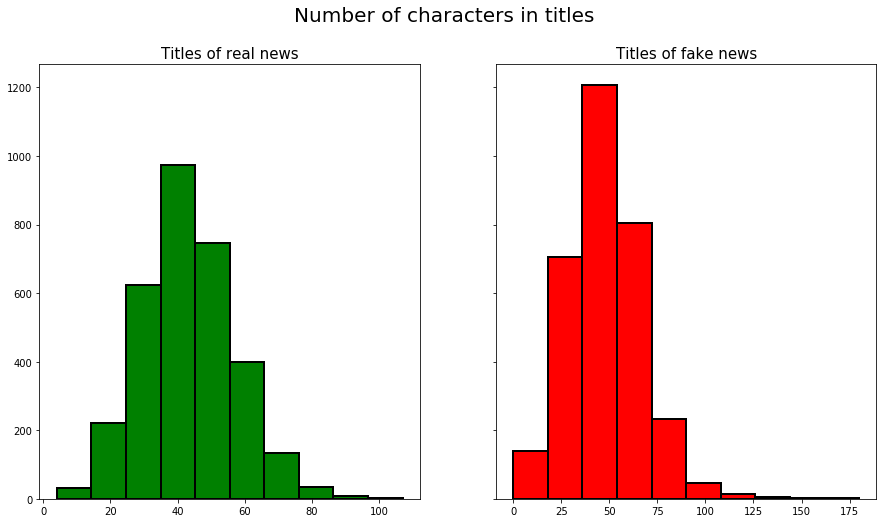

In [68]:
plot, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), sharey=True)
plot.suptitle('Number of characters in titles', fontsize=20)
length = df[df['label']==0]['title'].str.len()
ax1.hist(length, color = 'green', linewidth = 2, edgecolor = 'black')
ax1.set_title('Titles of real news', fontsize = 15)
length = df[df['label']==1]['title'].str.len()
ax2.hist(length,linewidth = 2, edgecolor = 'black', color = 'red')
ax2.set_title('Titles of fake news', fontsize=15)

A plot showing the number of characters in texts of real and fake news will be created.

Text(0.5, 1.0, 'Texts of fake news')

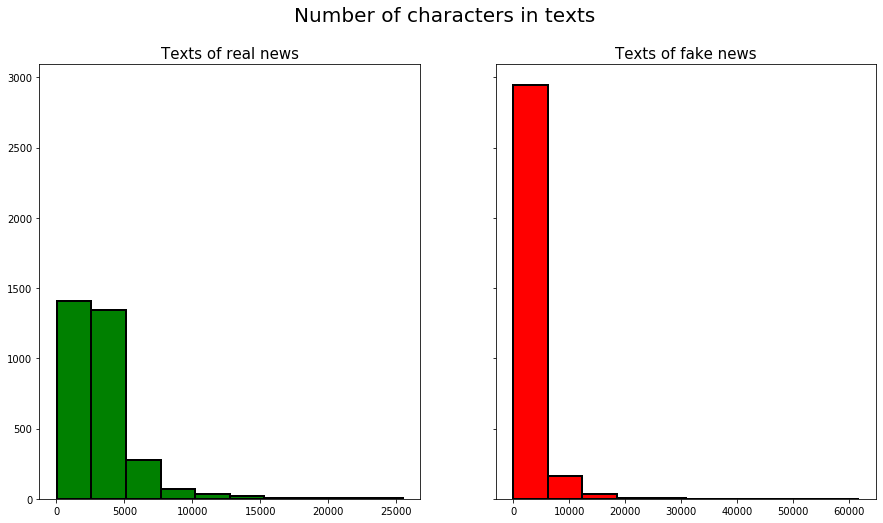

In [69]:
plot, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), sharey=True)
plot.suptitle('Number of characters in texts', fontsize=20)
length = df[df['label']==0]['text'].str.len()
ax1.hist(length, color = 'green', linewidth = 2, edgecolor = 'black')
ax1.set_title('Texts of real news', fontsize = 15)
length = df[df['label']==1]['text'].str.len()
ax2.hist(length,linewidth = 2, edgecolor = 'black', color = 'red')
ax2.set_title('Texts of fake news', fontsize=15)

## Step 4 - Machine Learning / Modeling

In [70]:
#assign the labels to y to compare them with the predictions made by model
y = df["label"]

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

#function that compares different test_size splits and its result on multiple metric scores
def func_classifier_metrics(classifier):
    start = time.time()
    print("-start-")
    for x in range(1, 10):
        print(x)
        X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=x/10, random_state=42, shuffle=True)
        classifier.fit(X_train ,y_train)
        
        pred_on_test_data = classifier.predict(X_test)
        acc_score = accuracy_score(y_test, pred_on_test_data)
        prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
        recall = recall_score(y_test.values, pred_on_test_data)
        f1 = f1_score(y_test.values, pred_on_test_data, average="binary")
        l_loss = log_loss(y_test.values, pred_on_test_data)
        roc_auc = roc_auc_score(y_test.values, pred_on_test_data)
        
        print("Test size: ", x/10, "| Accuracy: ", "{0:.4f}".format(acc_score), "| Precision: ", "{0:.4f}".format(prec), "| Recall: ", "{0:.4f}".format(recall), "| F1: ", "{0:.4f}".format(f1), "| ROC-AUC: ", "{0:.4f}".format(roc_auc), "| Log. Loss: ", "{0:.4f}".format(l_loss))
        x = x + 1
    print("end of loop")   
    print("Time: {} mins".format(round((time.time() - start) / 60, 2)))

In [72]:
#function that builds a model with a specific test set size
def func_classifier_metrics_ts(classifier, ts):
    start = time.time()
    print("-start-")
    X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=ts, random_state=42, shuffle=True)
    classifier.fit(X_train ,y_train)
        
    pred_on_test_data = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred_on_test_data)
    prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
    recall = recall_score(y_test.values, pred_on_test_data)
    f1 = f1_score(y_test.values, pred_on_test_data, average="binary")
    l_loss = log_loss(y_test.values, pred_on_test_data)
    roc_auc = roc_auc_score(y_test.values, pred_on_test_data)
        
    print("Test size: ", ts, "| Accuracy: ", "{0:.4f}".format(acc_score), "| Precision: ", "{0:.4f}".format(prec), "| Recall: ", "{0:.4f}".format(recall), "| F1: ", "{0:.4f}".format(f1), "| ROC-AUC: ", "{0:.4f}".format(roc_auc), "| Log. Loss: ", "{0:.4f}".format(l_loss)) 
    print("Time: {} mins".format(round((time.time() - start) / 60, 2)))

### 4 a) - Naive Bayes Classifier

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [74]:
#Multinomial Naive Bayes
#https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes

mNB = MultinomialNB()
func_classifier_metrics(mNB)

-start-
1
Test size:  0.1 | Accuracy:  0.8104 | Precision:  0.8419 | Recall:  0.7484 | F1:  0.7924 | ROC-AUC:  0.8084 | Log. Loss:  6.5477
2
Test size:  0.2 | Accuracy:  0.8152 | Precision:  0.8516 | Recall:  0.7524 | F1:  0.7990 | ROC-AUC:  0.8137 | Log. Loss:  6.3840
3
Test size:  0.3 | Accuracy:  0.8110 | Precision:  0.8557 | Recall:  0.7415 | F1:  0.7945 | ROC-AUC:  0.8100 | Log. Loss:  6.5295
4
Test size:  0.4 | Accuracy:  0.7990 | Precision:  0.8303 | Recall:  0.7413 | F1:  0.7833 | ROC-AUC:  0.7979 | Log. Loss:  6.9433
5
Test size:  0.5 | Accuracy:  0.7801 | Precision:  0.8222 | Recall:  0.7114 | F1:  0.7628 | ROC-AUC:  0.7797 | Log. Loss:  7.5953
6
Test size:  0.6 | Accuracy:  0.7722 | Precision:  0.8104 | Recall:  0.7069 | F1:  0.7552 | ROC-AUC:  0.7718 | Log. Loss:  7.8663
7
Test size:  0.7 | Accuracy:  0.7608 | Precision:  0.8095 | Recall:  0.6797 | F1:  0.7389 | ROC-AUC:  0.7605 | Log. Loss:  8.2626
8
Test size:  0.8 | Accuracy:  0.7494 | Precision:  0.7608 | Recall:  0.721

In [75]:
bNB = BernoulliNB()
func_classifier_metrics(bNB)

-start-
1
Test size:  0.1 | Accuracy:  0.8073 | Precision:  0.8433 | Recall:  0.7386 | F1:  0.7875 | ROC-AUC:  0.8051 | Log. Loss:  6.6568
2
Test size:  0.2 | Accuracy:  0.8049 | Precision:  0.8404 | Recall:  0.7411 | F1:  0.7876 | ROC-AUC:  0.8034 | Log. Loss:  6.7387
3
Test size:  0.3 | Accuracy:  0.8015 | Precision:  0.8516 | Recall:  0.7233 | F1:  0.7822 | ROC-AUC:  0.8004 | Log. Loss:  6.8569
4
Test size:  0.4 | Accuracy:  0.8049 | Precision:  0.8474 | Recall:  0.7341 | F1:  0.7867 | ROC-AUC:  0.8035 | Log. Loss:  6.7387
5
Test size:  0.5 | Accuracy:  0.7836 | Precision:  0.8343 | Recall:  0.7044 | F1:  0.7639 | ROC-AUC:  0.7831 | Log. Loss:  7.4753
6
Test size:  0.6 | Accuracy:  0.7678 | Precision:  0.8199 | Recall:  0.6826 | F1:  0.7449 | ROC-AUC:  0.7672 | Log. Loss:  8.0209
7
Test size:  0.7 | Accuracy:  0.7585 | Precision:  0.8188 | Recall:  0.6615 | F1:  0.7318 | ROC-AUC:  0.7581 | Log. Loss:  8.3405
8
Test size:  0.8 | Accuracy:  0.7510 | Precision:  0.7667 | Recall:  0.715

In [76]:
gNB = GaussianNB()
func_classifier_metrics(gNB)

-start-
1
Test size:  0.1 | Accuracy:  0.6872 | Precision:  0.7571 | Recall:  0.5196 | F1:  0.6163 | ROC-AUC:  0.6818 | Log. Loss:  10.8037
2
Test size:  0.2 | Accuracy:  0.6730 | Precision:  0.7383 | Recall:  0.5113 | F1:  0.6042 | ROC-AUC:  0.6692 | Log. Loss:  11.2947
3
Test size:  0.3 | Accuracy:  0.6761 | Precision:  0.7450 | Recall:  0.5214 | F1:  0.6135 | ROC-AUC:  0.6740 | Log. Loss:  11.1856
4
Test size:  0.4 | Accuracy:  0.6817 | Precision:  0.7346 | Recall:  0.5488 | F1:  0.6282 | ROC-AUC:  0.6791 | Log. Loss:  10.9946
5
Test size:  0.5 | Accuracy:  0.6689 | Precision:  0.7193 | Recall:  0.5474 | F1:  0.6217 | ROC-AUC:  0.6682 | Log. Loss:  11.4366
6
Test size:  0.6 | Accuracy:  0.6701 | Precision:  0.7072 | Recall:  0.5734 | F1:  0.6333 | ROC-AUC:  0.6695 | Log. Loss:  11.3948
7
Test size:  0.7 | Accuracy:  0.6660 | Precision:  0.7009 | Recall:  0.5745 | F1:  0.6315 | ROC-AUC:  0.6656 | Log. Loss:  11.5364
8
Test size:  0.8 | Accuracy:  0.6598 | Precision:  0.6820 | Recall:

Multinomial Naive Bayes seems to provide the best accuracy score with a test size of 0.1
Accuracy:  0.8215

In [77]:
#save the model
mNB = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.1, random_state=2, shuffle=True)
mNB.fit(X_train ,y_train)
pred_on_test_data = mNB.predict(X_test)
mNB_acc_score = accuracy_score(pred_on_test_data, y_test)
mNB_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
mNB_recall = recall_score(y_test.values, pred_on_test_data)

In [78]:
#save the other models as well!
bNB = BernoulliNB()
X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.1, random_state=2, shuffle=True)
bNB.fit(X_train ,y_train)
pred_on_test_data = bNB.predict(X_test)
bNB_acc_score = accuracy_score(pred_on_test_data, y_test)
bNB_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
bNB_recall = recall_score(y_test.values, pred_on_test_data)

In [79]:
gNB = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.1, random_state=2, shuffle=True)
gNB.fit(X_train ,y_train)
pred_on_test_data = gNB.predict(X_test)
gNB_acc_score = accuracy_score(pred_on_test_data, y_test)
gNB_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
gNB_recall = recall_score(y_test.values, pred_on_test_data)

### 4 b) - Support Vector Machines

In [80]:
from sklearn.svm import SVC
#svc = SVC(gamma='auto', random_state=0)
#svc = SVC(gamma="auto")
svc = SVC(gamma="scale")

Google sheet for comparing the different settings and their results

https://docs.google.com/spreadsheets/d/1eSNWea1PujxDQeiwCEZZRcOWYB3lpEsqjekS0HRSUBw/edit#gid=0

In [81]:
#svc = SVC(gamma='scale')
#func_classifier_metrics(svc)

In [82]:
#svc_test = SVC(gamma="scale", C=1.5, kernel="poly", degree=2, coef0=0.001)

SVM with gamma=scale, C=1.5, kernel="poly", degree=2, coef0=0.001 and a test size of 0.3 yielded in the highest accuracy:  0.8380 

In [83]:
#save the model
svc = SVC(gamma="scale", C=1.5, kernel="poly", degree=2, coef0=0.001)

X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.3, random_state=2, shuffle=True)
svc.fit(X_train ,y_train)
pred_on_test_data = svc.predict(X_test)
svc_acc_score = accuracy_score(pred_on_test_data, y_test)
svc_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
svc_recall = recall_score(y_test.values, pred_on_test_data)

### 4 c) - Multi Layer Perceptron

In [84]:
from sklearn.neural_network import MLPClassifier

Google sheet for comparing the different settings and their results

https://docs.google.com/spreadsheets/d/1BBmq1wlc3AzKkBj5wE9EmoaM--XYjovsaVtyVbbHxes/edit#gid=0

In [85]:
mlp = MLPClassifier(alpha=0.6, learning_rate="invscaling")
func_classifier_metrics(mlp)

-start-
1
Test size:  0.1 | Accuracy:  0.8120 | Precision:  0.7913 | Recall:  0.8301 | F1:  0.8102 | ROC-AUC:  0.8126 | Log. Loss:  6.4932
2
Test size:  0.2 | Accuracy:  0.8207 | Precision:  0.8059 | Recall:  0.8333 | F1:  0.8194 | ROC-AUC:  0.8210 | Log. Loss:  6.1931
3
Test size:  0.3 | Accuracy:  0.8210 | Precision:  0.8098 | Recall:  0.8323 | F1:  0.8209 | ROC-AUC:  0.8211 | Log. Loss:  6.1840
4
Test size:  0.4 | Accuracy:  0.8104 | Precision:  0.7898 | Recall:  0.8356 | F1:  0.8121 | ROC-AUC:  0.8109 | Log. Loss:  6.5477
5
Test size:  0.5 | Accuracy:  0.7927 | Precision:  0.7794 | Recall:  0.8131 | F1:  0.7959 | ROC-AUC:  0.7929 | Log. Loss:  7.1588
6
Test size:  0.6 | Accuracy:  0.7804 | Precision:  0.7666 | Recall:  0.8023 | F1:  0.7840 | ROC-AUC:  0.7805 | Log. Loss:  7.5844
7
Test size:  0.7 | Accuracy:  0.7680 | Precision:  0.7538 | Recall:  0.7934 | F1:  0.7731 | ROC-AUC:  0.7681 | Log. Loss:  8.0132
8
Test size:  0.8 | Accuracy:  0.7618 | Precision:  0.7364 | Recall:  0.809

C:\Users\SAIF NOOR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test size:  0.9 | Accuracy:  0.7393 | Precision:  0.7127 | Recall:  0.7975 | F1:  0.7527 | ROC-AUC:  0.7396 | Log. Loss:  9.0031
end of loop
Time: 25.53 mins


MLP with alpha=0.6, learning_rate="invscaling" and a test size of 0.25 yielded in the highest accuracy: 0.8258

In [86]:
#save the model
mlp = MLPClassifier(alpha=0.6, learning_rate="invscaling")

X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.25, random_state=2, shuffle=True)
mlp.fit(X_train ,y_train)
pred_on_test_data = mlp.predict(X_test)
mlp_acc_score = accuracy_score(pred_on_test_data, y_test)
mlp_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
mlp_recall = recall_score(y_test.values, pred_on_test_data)

### 4 c) - Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

Google sheet for comparing the different settings and their results

https://docs.google.com/spreadsheets/d/1Etjo4qA_P7Ko148z329JFzbxBC1ITmxGhsnD9OzfYBE/edit#gid=0

In [88]:
rfc = RandomForestClassifier()
func_classifier_metrics(rfc)

-start-
1
Test size:  0.1 | Accuracy:  0.8294 | Precision:  0.8037 | Recall:  0.8562 | F1:  0.8291 | ROC-AUC:  0.8302 | Log. Loss:  5.8930
2
Test size:  0.2 | Accuracy:  0.8160 | Precision:  0.7966 | Recall:  0.8366 | F1:  0.8161 | ROC-AUC:  0.8164 | Log. Loss:  6.3567
3
Test size:  0.3 | Accuracy:  0.7983 | Precision:  0.7784 | Recall:  0.8259 | F1:  0.8015 | ROC-AUC:  0.7987 | Log. Loss:  6.9660
4
Test size:  0.4 | Accuracy:  0.8061 | Precision:  0.7682 | Recall:  0.8654 | F1:  0.8139 | ROC-AUC:  0.8072 | Log. Loss:  6.6978
5
Test size:  0.5 | Accuracy:  0.7877 | Precision:  0.7585 | Recall:  0.8404 | F1:  0.7973 | ROC-AUC:  0.7880 | Log. Loss:  7.3335
6
Test size:  0.6 | Accuracy:  0.7715 | Precision:  0.7356 | Recall:  0.8431 | F1:  0.7857 | ROC-AUC:  0.7719 | Log. Loss:  7.8937
7
Test size:  0.7 | Accuracy:  0.7648 | Precision:  0.7278 | Recall:  0.8432 | F1:  0.7813 | ROC-AUC:  0.7651 | Log. Loss:  8.1223
8
Test size:  0.8 | Accuracy:  0.7532 | Precision:  0.7024 | Recall:  0.871

In [89]:
rfc = RandomForestClassifier(n_estimators=500)
func_classifier_metrics_ts(rfc, 0.25)

-start-
Test size:  0.25 | Accuracy:  0.8149 | Precision:  0.7851 | Recall:  0.8570 | F1:  0.8195 | ROC-AUC:  0.8157 | Log. Loss:  6.3929
Time: 4.63 mins


RFC with n_estimators=500 and a test size of 0.25 yielded in the highest accuracy: 0.8112.

In [90]:
#save the model
rfc = RandomForestClassifier(n_estimators=500)

X_train, X_test, y_train, y_test = train_test_split(df_title_tfidf, y, test_size=0.25, random_state=2, shuffle=True)
rfc.fit(X_train ,y_train)
pred_on_test_data = rfc.predict(X_test)
rfc_acc_score = accuracy_score(pred_on_test_data, y_test)
rfc_prec = precision_score(y_test.values, pred_on_test_data, pos_label=1)
rfc_recall = recall_score(y_test.values, pred_on_test_data)

In [91]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#func_classifier_metrics_ts(lr, 0.33)

## 5 - Prediction

Now the previously deleted articles will be added to a new dataframe. After that the different models which have been built will make predictions on whether they are real or fake news.

In [92]:
pred_data = {'index':  [5099, 4988, 534, 4777, 2734, 2058],
            'title': ['smell hillari fear', 'poll find american support polic highest near year','battl new york primari matter', 'uk announc new troop deploy near russia border', 'russia join franc strike isi stronghold syria', 'shortag lethal inject drug put death penalti suprem court'],
            'text': ['daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exact hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir leftw establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fair practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack women jame carvill appear msnbc remind everyon still aliv insan accus comey coordin hous republican kgb thought vast right wing conspiraci stretch countless media stori charg comey violat procedur know procedur violat email classifi inform store bathroom server senat harri reid sent comey letter accus violat hatch act hatch act nice idea much relev age obama tenth amend cabl news spectrum quick fill media hack glanc wikipedia articl hatch act tabl accus fbi director one awkward conspiraci hillari ever jame comey realli hurt hillari pick one hell strang way long ago democrat breath sigh relief gave hillari clinton pass promin public statement realli elect trump keep email scandal go trash investig payrol hous republican kgb back play coy sudden develop vladimir putin paul ryan talk take look anthoni weiner comput either comey cun fbi director ever live awkward tri navig polit mess trap doj leadership whose polit futur tie hillari victori bureau whose apolit agent want allow job truli mysteri thing hillari associ decid go war respect feder agenc american like fbi hillari clinton enjoy unfavor rate interest question hillari old strategi lie deni fbi even crimin investig underway instead associ insist secur review fbi correct shrug old breezi denial approach given way savag assault fbi pretend noth wrong bad strategi better one pick fight fbi lunat clinton associ tri claim fbi realli kgb two possibl explan hillari clinton might arrog enough lash fbi believ victori near kind hubri led plan victori firework display could lead declar war fbi irrit final mile campaign explan peopl panick go war fbi behavior smart focus presidenti campaign act desper presidenti candid decid option tri destroy credibl fbi hubri fear fbi might reveal origin fbi investig hillari clinton confid could ride good reason believ hillari clinton gone place paranoid wreck within short space time posit clinton campaign promis unit countri replac desper flail oper focus energi fight fbi one reason bizarr behavior clinton campaign decid fbi investig latest batch email pose threat surviv gone fight fbi unpreced step born fear hard know whether fear justifi exist fear alreadi tell us whole lot clinton loyalist rig old investig knew outcom ahead time well knew debat question sudden longer control afraid smell fear fbi wiretap investig clinton foundat find new email time clintonworld panick spinmeist clintonworld claim email scandal much smoke without fire appear improprieti without substanc react smoke respond fire misguid assault fbi tell us hillari clinton alli afraid revel bigger fundament illeg email setup email setup preemptiv cover clinton campaign panick bad belief right wrong whatev crime illeg setup meant cover risk expos clinton weather countless scandal year whatev protect time around bigger usual corrupt briberi sexual assault abus power follow around throughout year bigger damag alleg alreadi come want fbi investig anywher near campaign comey pure intimid also warn senior fbi peopl valu career warn stay away democrat close rank around nomine fbi ugli unpreced scene may also last stand hillari clinton awkward wound way numer scandal elect cycl never shown fear desper chang whatev afraid lie buri email huma abedin bring like noth els', 'past year american seen polic offic ambush assassin watch thin line protect citizen crimin revil group black live matterand america take standa new gallup poll show respect polic hit highest point almost year relat stori video suspect beat femal offic use weapon fear backlash polic offic issu move respons kaepernick protest nba anthem singer drop knee final line protest racial inequ poll taken earli octob found percent american great deal respect polic anoth percent say respect obvious violent rhetor seen blm backfir wrote andrew mark miller young conserv peopl respect cop ever clear see difficult job ad miller said black live matter movement deni true purpos give nonsens blm antipolic wrote fact mani blm support say elimin polic forc entir miller said bottom line clear poll repudi tactic left use demon law enforc get around wrote trend stori frustrat media bias trump campaign take case direct voter night show facebook rnc offici take cnn host task claim media bias independ voter push trump front florida ohio level american support polic reflect poll reach sinc urban riot protestdriven long hot summer make citi danger percent respond said gave polic great deal respect gallup began survey american polic poll also show major chang attitud year earlier poll show highest level date american lack confid polic offic percent increas shoot polic coincid highprofil incid law enforc offici shoot kill unarm black men despit flare racial tension incid respect local polic increas among white nonwhit gallup report analyz result sharp increas past year profess respect local law enforc come mani polic say feel defens polit live duti amid heat nation discuss polic brutal shoot addedgallup said futur event could chang level support enjoy polic unclear whether spike respect polic stay power reflect most reaction retaliatori kill polic offic last summer wrotewhat think', 'primari day new york frontrunn hillari clinton donald trump lead pollstrump vow win enough deleg clinch republican nomin prevent contest convent senst cruz rtexa berni sander dvt ohio gov john kasich arent give yeta big win new york could tip scale republican democrat frontrunn year race white hous clinton trump suffer loss recent contest shift momentum rivalsw eight last nine caucus primari cheer sander recent told supporterswhil win new york trump clinton expect margin victori also importanttrump need captur percent vote statewid want posit win state gop deleg would put one step closer avoid contest conventionwev got vote know cruz way way poll trump urg supportersmeanwhil sander hope close race empir state loss point mean hell need win percent remain deleg clinch nominationdespit predict loss new york cruz hasnt lost momentum hes hope sweep deleg weekend hes talk win novemberbecaus im nomine win general elect cruz promis support beat hillari key swing state beat hillari independ beat hillari young peoplefor cruz kasich sander move new york state trump clinton two stay home state watch result come', 'militari british defens secretari michael fallon photo afp british defens minist michael fallon say uk set deploy hundr troop baltic region europ support nato alli face assert russia fallon told nato ministeri meet brussel wednesday britain would send soldier estonia fulfil pledg deliv one four battalion nato enhanc forward presenc eastern europ back rise defens budget deploy air land sea forc show continu play lead role nato support defens secur alli north south allianc fallon said nato announc juli would deploy rotat basi four multin battalion poland baltic latvia deter refer russian incurs address meet fallon also said four british typhoon fighter jet would dispatch romania nato southern air polic mission suppos protect baltic state airspac possibl attack russia two thing reassur need done formid presenc deterr fallon said earlier interview simpli serious militari presenc move like draw critic moscow anger nato militari buildup western border usl militari allianc cut tie moscow reinforc presenc near russia border ever sinc uk russia strong disagr number issu main conflict syria ukrain two countri militari forc involv seri aerial naval confront britain send jet warship sever occas intercept russian bomber naval fleet latest encount occur thursday russian aircraft career admir kuznetsov sevenship task forc shadow two british warship cours sail north sea english channel way syria load', 'russian militari might join french warplan tuesday two nation struck back islam state four day terror team carri coordin attack pari leav peopl french fighter jet carri new airstrik isi target syria accord french defens minist jeanyv le drianalso twelv russian longrang bomber includ superson backfir flew base mozdok russia near border georgia azerbaijan launch cruis missil insid raqqa us offici knowledg mission told fox newsth superson bomber flew caspian sea iran iraq syria unleash volley cruis missil raqqath us militari still assess damagea defens offici middl east tell fox news despit countri share object target isi high unlik french russian coordin strike offici also said think french would communic russian secretfox news told russia inform us launch new assault offici character russian effort devast islam state group claim respons crash russian passeng plane egypt last month kill peopl tuesday russia secur servic said homemad explos devic brought airlin call terrorist actcruis missil also fire monday caspian sea russian navi missil boat vessel launch similar salvo syria last monthrussia defens minist also said warplan fire cruis missil milit posit syria idlib aleppo provinc sergei shoigu told report missil fire warplan islam state posit aleppo provinc wherea idlib presenc nusra milit groupmeantim presid vladimir putin order russian missil cruiser moskva current mediterranean start cooper french militari oper syria putin said french aircraft carrier task forc approach moskva soon cruiser cooper alliesgermani itali rule role air campaign isi syria german foreign minist frankwalt steinmeier said doesnt make sens add nation carri air attacksgermani provid weapon equip kurdish fighter battl isi northern iraq steinmeier said right strategi hold ground make slight territori gainsitalian defens minist roberta pinotti said countri alreadi plan beef action iraq rule italian militari role syria said itali assur franc maximum avail cooperationalso tuesday franc invok neverbeforeus articl eus lisbon treati oblig member bloc give aid assist mean power member countri victim arm aggress territori french defens minist jeanyv le drian said eu partner could help either take part franc oper syria iraq eas load provid support franc operationsth airstrik came wall street journal cite two western secur offici report abdelhamid abaaoud sought target airstrik could locat western intellig offici told paper effort monitor communic abaaoud syria jihadist europ complic inabl tell whether abaaoud teenag brother speakingabaaoud name french offici key figur suspect plan organ pari attack includ seri suicid bomb outsid countri nation stadium massacr concert hallh came public notic belgium last year take brother syria appear isi propaganda video boast pride pile dead bodi infidel enemi trailer point abaaoud return belgium escap author januari year polic foil plot attack offic mastermind behalf cell base belgian town vervier ensu gun battl two abaaoud alleg accomplic kill abaaoud somehow escapedh told month isi magazin dabiq februari issu slip away european intellig agenc allah blind vision ad name pictur news yet abl stay homeland plan oper leav safe becam necessaryfrench offici identifi abaaoud prime suspect associ press cite chatter isi figur abaaoud recommend concert ideal target inflict maximum casualti well electron communic abaaoud one pari attack blew upwestern offici told journal knowledg plan attack french capit sought abaaoud admit know whether death would enough stop attack carri seven suicid attack includ set three brothersa belgian offici told journal certain abaaoud knew salah abdeslam hunt author across europ earli tuesday suspicion involv pari terror two jihadist grew far brussel suburb molenbeek spent time prison petti crimespeopl pari fought back way continu eat drink merri bar restaur owner urg peopl return local nightspot tuesday relay messag onlin social media slogan tous au bistrot everyon bistroth messag back restaur websit le food say peopl go pay tribut victim support food drink industri show franc give fearoth parisian post pictur twitter citi mani cafe restaur patio use hashtag jesuisauterrass im patiofox news luca tomlinson associ press contribut reportclick wall street journal',
                 'suprem court mondaydecid oklahoma may continu use controversi sedat midazolam lethal inject even drug link sever botch execut suprem court case dealt botch execut clayton lockett oklahoma lockett execut took minut experiment lethal inject drug administ led four inmat one execut suprem court decid issu file lawsuit challeng oklahoma lethal inject protocol suprem court ultim decid botch execut along evid wasnt adequ proof midazolam cruel unusu punishmentbut oklahoma didnt alway use midazolam execut use controversi sedat actual respons toan ongo lethal inject drug shortag left futur death penalti unclear utah oklahoma tennesse state execut legal ad new angl perenni debat moral effect capit punishmentov past year shortag sodium thiopent key drug lethal inject left state scrambl altern way execut prison inspir shroud process secrecyth shortag began around drug supplier around world includ us began refus suppli drug inject either opposit death penalti concern product associ executionsth drug cut right left deborah denno death penalti expert fordham univers saidth drug cut right lefthospira inc sole us supplier sodium thiopent accord denno hospira stop produc drug struggl procur activ ingredi product field legal threat author itali death penalti vehement opposedsom state still manag import sodium thiopent shadier oversea sourc begin us district court district columbia issu sever rule ban import drug decid import suppli didnt meet fda regulationsa shortag continu state turn european compani altern drug phenobarbit propofol typic use sedat surgeri compani pressur european union export ban activist like repriev foreign govern prohibit death penalti time refus suppli drugsa compani either stop suppli drug unabl export us state began look new sometim untest way execut prisonerswith pharmaceut compani pictur state resort compound pharmaci make drug nowescapedmost regul sinc small most outofsight transact individu major custom usbas pharmaci began produc experiment sometim secret cocktail state executionscompound pharmaci origin meant make custom drug individu peopl major buyer like state govern denno said result drug cocktail often shoddi georgia stop execut lethal inject drug cloudi decri experiment danger civil right group american civil liberti unionbut even compound pharmaci may soon stop provid execut drug state intern academi compound pharmacist march announc discourag member particip prepar dispens distribut compound medic use legal author executionsproduc lethal inject drug go invit scrutinyth stanc may way compound pharmaci larg unregul avoid extra regulatori scrutini come produc lethal inject drug compound pharmaci alreadi enough public relat issu denno said massachusett instanc law crack compound pharmaci local compani drug implic death peopl produc lethal inject drug denno said go invit scrutinybut instead step regul death penalti state adopt measur shield compound pharmaci provid lethal drug outsid scrutinyin decemb ohio pass law keep supplier lethal drug inject anonym john murphi execut director ohio prosecut attorney associ support law said last decemb chang meant make execut process secret protect ident peopl involv dont get harass intimid attack saidth drug shortag hasnt led concern market forc regul suppli demand also rais import constitut question cruel unusu punish shortag led state tri experiment unpredict drug executionssinc sever highprofil botch execut describ gruesom detail press involv secret experiment use midazolamher casesthes botch execut drew critic put unwant spotlight use experiment lethal drug critic say violat constitut protect cruel unusu punish state includ ohio oklahoma delay execut review practicesdenno expect problem continu state struggl replac superior drug like sodium thiopent everi time state chang new drug introduc degre uncertainti denno said drug arent first choicebotch execut around long death penalti percent lethal inject percent execut botch accord austin sarat gruesom spectaclespart reason state began use lethal inject drug previous prefer method execut mani state electrocut often horrifi result includ erupt burn flesh even live fire prison gasp air slowli diedw realli incompet peopl thisbut lethal inject carri problem beyond drug use procedur may make even prone bungl one doctor like qualifi administ dead drug wont particip execut administ dead drug kill someon would violat profession ethic american board anesthesiologist vote revok certif member particip execut prisonera result state arent typic abl bring besttrain doctor particular anesthesiologist administ drug danger mishandl realli incompet peopl denno saidperhap result lethal inject alway one riskier form execut even drug shortag forc state experi altern substancesin oklahoma doctor paramed particip clayton lockett botch execut said receiv train theap sean murphi report execut team administ needl werent long enough procedur caus state offici call bloodi mess doctor tri set iv line lockett groin blood gush outin addit physic botch execut alway possibl state execut innoc person april studi publish pnas scientif journal suggest least percent peopl sentenc death us like innoc least six peopl exoner death sentenc accord januari report nation registri exonerationsso far denno fordham univers track three state move toward altern lethal inject run drug tennesse reinstat possibl electr chair utah hasallow fire squad oklahoma haspermit nitrogen gasthes method execut larg abandon year ago suprem court forc state reform execut procedur less racial discriminatori state began most use lethal inject fantast chart post john west quartz showsstat could potenti seek differ drug continu use lethal inject avoid execut method wide seen gruesom state also like wari repeat problem theyv experienc current batch drug thing go happen denno said cycl everi time state tri theyv cut offbut mani method execut dont involv inject drug major problemsdenno predict gas execut like turn disast said gas issu lethal inject drug unclear state would get chemic requir execut whatev chemic use may suitabl quick relat painless death also recal ghast memori world war ii nazi use gas chamber kill prison death campsth fire squad quickest surest train execution itelectrocut hang abandon first place often result botch execut electrocut caus burn skin live fire multipl execut hang could go wrong rope broke prison decapit also takelong minut kill prisonerdenno argu fire squad may turn human avail option even lethal inject quickest surest train execution saiddunham execut director thedeath penalti inform center said state deal realiti there human way kill someon method execut problem dunham said involuntari termin anoth person life execut inher violent actof cours state may abl come anoth method entir repeal death penalti altogeth least state appear stick tradit way execut prisonerscapit punish persist drug shortag botch execut still strong public support us put pressur lawmak find altern lethal inject drug rather abolish death penalti state still legalamerica support death penalti stand sharp contrast europ belarus promoscow dictatorship still allow capit punishmentan octob gallup poll found percent american support death penalti percent oppos itsupport death penalti get littl complic american ask specif method execut nbc news poll may found near twothird voter support altern lethal inject needl isnt option us adult told yougov februari survey gas chamber electr chair fire squad hang behead cruel unusu punish lethal inject isntsupport death penalti also vari state state execut much cultur legal ingrain south lesser extent west rest countri eighteen state abolish death penalti northeast midwest accord death penalti inform centerso popular support general pressur lawmak find altern lethal inject that necessarili true part countri us adult dont appear support method executionregardless lawmak number execut drop year report death penalti inform center found number execut hit low even that case death penalti whole remain popular cultur ingrain us that led state seek altern like experiment drug fire squad nitrogen gas rather abolish execut altogeth'],
            'label': [1, 1, 0, 1, 0, 0],
            }

In [93]:
pred_tfidf_df = tfidf.transform(pred_data["title"])
#prediction = mNB.predict(pred_tfidf_df)

### 5 a) Multinomial Naive Bayes

In [94]:
mNB = MultinomialNB()
func_classifier_metrics_ts(mNB, 0.2)

-start-
Test size:  0.2 | Accuracy:  0.8152 | Precision:  0.8516 | Recall:  0.7524 | F1:  0.7990 | ROC-AUC:  0.8137 | Log. Loss:  6.3840
Time: 0.01 mins


In [95]:
#mNB.predict_proba(pred_tfidf_df)

In [96]:
mNB_pred = mNB.predict(pred_tfidf_df)

mNB_pred_acc = accuracy_score(pred_data["label"], mNB_pred)
mNB_pred_prec = precision_score(pred_data["label"], mNB_pred)
mNB_pred_recall = recall_score(pred_data["label"], mNB_pred)
mNB_pred_f1 = f1_score(pred_data["label"], mNB_pred, average="binary")
mNB_pred_l_loss = log_loss(pred_data["label"], mNB_pred)
mNB_pred_roc_auc = roc_auc_score(pred_data["label"], mNB_pred)

print("Accuracy: ", "{0:.4f}".format(mNB_pred_acc), "| Precision: ", "{0:.4f}".format(mNB_pred_prec), "| Recall: ", "{0:.4f}".format(mNB_pred_recall), "| F1: ", "{0:.4f}".format(mNB_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(mNB_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(mNB_pred_l_loss)) 


Accuracy:  0.6667 | Precision:  0.6667 | Recall:  0.6667 | F1:  0.6667 | ROC-AUC:  0.6667 | Log. Loss:  11.5131


In [97]:
mNB_pred

array([0, 1, 0, 1, 1, 0], dtype=int64)

### 5 b) Gaussian Naive Bayes

In [98]:
gNB = GaussianNB()
func_classifier_metrics_ts(gNB, 0.33)

-start-
Test size:  0.33 | Accuracy:  0.6812 | Precision:  0.7452 | Recall:  0.5331 | F1:  0.6216 | ROC-AUC:  0.6786 | Log. Loss:  11.0115
Time: 0.03 mins


In [99]:
gNB_pred = gNB.predict(pred_tfidf_df.toarray())

gNB_pred_acc = accuracy_score(pred_data["label"], gNB_pred)
gNB_pred_prec = precision_score(pred_data["label"], gNB_pred)
gNB_pred_recall = recall_score(pred_data["label"], gNB_pred)
gNB_pred_f1 = f1_score(pred_data["label"], gNB_pred, average="binary")
gNB_pred_l_loss = log_loss(pred_data["label"], gNB_pred)
gNB_pred_roc_auc = roc_auc_score(pred_data["label"], gNB_pred)

print("Accuracy: ", "{0:.4f}".format(gNB_pred_acc), "| Precision: ", "{0:.4f}".format(gNB_pred_prec), "| Recall: ", "{0:.4f}".format(gNB_pred_recall), "| F1: ", "{0:.4f}".format(gNB_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(gNB_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(gNB_pred_l_loss)) 


Accuracy:  0.8333 | Precision:  1.0000 | Recall:  0.6667 | F1:  0.8000 | ROC-AUC:  0.8333 | Log. Loss:  5.7565


In [100]:
gNB_pred

array([1, 1, 0, 0, 0, 0], dtype=int64)

### 5 c) Bernoulli Naive Bayes

In [101]:
bNB = BernoulliNB()
func_classifier_metrics_ts(bNB, 0.33)

-start-
Test size:  0.33 | Accuracy:  0.8013 | Precision:  0.8452 | Recall:  0.7290 | F1:  0.7828 | ROC-AUC:  0.8001 | Log. Loss:  6.8615
Time: 0.02 mins


In [102]:
bNB_pred = bNB.predict(pred_tfidf_df.toarray())

bNB_pred_acc = accuracy_score(pred_data["label"], bNB_pred)
bNB_pred_prec = precision_score(pred_data["label"], bNB_pred)
bNB_pred_recall = recall_score(pred_data["label"], bNB_pred)
bNB_pred_f1 = f1_score(pred_data["label"], bNB_pred, average="binary")
bNB_pred_l_loss = log_loss(pred_data["label"], bNB_pred)
bNB_pred_roc_auc = roc_auc_score(pred_data["label"], bNB_pred)

print("Accuracy: ", "{0:.4f}".format(bNB_pred_acc), "| Precision: ", "{0:.4f}".format(bNB_pred_prec), "| Recall: ", "{0:.4f}".format(bNB_pred_recall), "| F1: ", "{0:.4f}".format(bNB_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(bNB_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(bNB_pred_l_loss)) 


Accuracy:  0.8333 | Precision:  0.7500 | Recall:  1.0000 | F1:  0.8571 | ROC-AUC:  0.8333 | Log. Loss:  5.7566


In [103]:
bNB_pred

array([1, 1, 0, 1, 1, 0], dtype=int64)

### 5 d) Support Vector Machine

In [104]:
svc_pred = SVC(gamma="scale", C=1.5, kernel="poly", degree=2, coef0=0.001)
func_classifier_metrics_ts(svc_pred, 0.25)

-start-
Test size:  0.25 | Accuracy:  0.8484 | Precision:  0.8213 | Recall:  0.8827 | F1:  0.8509 | ROC-AUC:  0.8490 | Log. Loss:  5.2365
Time: 4.14 mins


In [105]:
svc_pred = svc_pred.predict(pred_tfidf_df.toarray())

svc_pred_acc = accuracy_score(pred_data["label"], svc_pred)
svc_pred_prec = precision_score(pred_data["label"], svc_pred)
svc_pred_recall = recall_score(pred_data["label"], svc_pred)
svc_pred_f1 = f1_score(pred_data["label"], svc_pred, average="binary")
svc_pred_l_loss = log_loss(pred_data["label"], svc_pred)
svc_pred_roc_auc = roc_auc_score(pred_data["label"], svc_pred)

print("Accuracy: ", "{0:.4f}".format(svc_pred_acc), "| Precision: ", "{0:.4f}".format(svc_pred_prec), "| Recall: ", "{0:.4f}".format(svc_pred_recall), "| F1: ", "{0:.4f}".format(svc_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(svc_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(svc_pred_l_loss)) 


Accuracy:  0.6667 | Precision:  0.6667 | Recall:  0.6667 | F1:  0.6667 | ROC-AUC:  0.6667 | Log. Loss:  11.5131


In [106]:
svc_pred

array([1, 0, 0, 1, 1, 0], dtype=int64)

### 5 e) Multilayer Perceptron

In [107]:
mlp_pred = MLPClassifier(alpha=0.6, learning_rate="invscaling")
func_classifier_metrics_ts(mlp_pred, 0.2)

-start-
Test size:  0.2 | Accuracy:  0.8207 | Precision:  0.8079 | Recall:  0.8301 | F1:  0.8188 | ROC-AUC:  0.8209 | Log. Loss:  6.1930
Time: 3.01 mins


In [108]:
mlp_pred = mlp_pred.predict(pred_tfidf_df)

mlp_pred_acc = accuracy_score(pred_data["label"], mlp_pred)
mlp_pred_prec = precision_score(pred_data["label"], mlp_pred)
mlp_pred_recall = recall_score(pred_data["label"], mlp_pred)
mlp_pred_f1 = f1_score(pred_data["label"], mlp_pred, average="binary")
mlp_pred_l_loss = log_loss(pred_data["label"], mlp_pred)
mlp_pred_roc_auc = roc_auc_score(pred_data["label"], mlp_pred)

print("Accuracy: ", "{0:.4f}".format(mlp_pred_acc), "| Precision: ", "{0:.4f}".format(mlp_pred_prec), "| Recall: ", "{0:.4f}".format(mlp_pred_recall), "| F1: ", "{0:.4f}".format(mlp_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(mlp_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(mlp_pred_l_loss)) 


Accuracy:  0.6667 | Precision:  0.6667 | Recall:  0.6667 | F1:  0.6667 | ROC-AUC:  0.6667 | Log. Loss:  11.5131


In [109]:
mlp_pred

array([1, 0, 0, 1, 1, 0], dtype=int64)

### 5 f) Random Forest

In [110]:
rfc_pred = RandomForestClassifier(n_estimators=500)
func_classifier_metrics_ts(rfc_pred, 0.25)

-start-
Test size:  0.25 | Accuracy:  0.8143 | Precision:  0.7815 | Recall:  0.8621 | F1:  0.8199 | ROC-AUC:  0.8152 | Log. Loss:  6.4148
Time: 4.61 mins


In [111]:
rfc_pred = rfc_pred.predict(pred_tfidf_df)

rfc_pred_acc = accuracy_score(pred_data["label"], rfc_pred)
rfc_pred_prec = precision_score(pred_data["label"], rfc_pred)
rfc_pred_recall = recall_score(pred_data["label"], rfc_pred)
rfc_pred_f1 = f1_score(pred_data["label"], rfc_pred, average="binary")
rfc_pred_l_loss = log_loss(pred_data["label"], rfc_pred)
rfc_pred_roc_auc = roc_auc_score(pred_data["label"], rfc_pred)

print("Accuracy: ", "{0:.4f}".format(rfc_pred_acc), "| Precision: ", "{0:.4f}".format(rfc_pred_prec), "| Recall: ", "{0:.4f}".format(rfc_pred_recall), "| F1: ", "{0:.4f}".format(rfc_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(rfc_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(rfc_pred_l_loss)) 


Accuracy:  0.6667 | Precision:  0.6667 | Recall:  0.6667 | F1:  0.6667 | ROC-AUC:  0.6667 | Log. Loss:  11.5131


In [112]:
rfc_pred

array([1, 0, 0, 1, 1, 0], dtype=int64)

### 5 g) Calculating KPIs of Classification Performance by Survey Participants

In [113]:
# 0.3780487805	0.8536585366	0.4329268293	0.1829268293	0.3536585366	0.3719512195
humans_pred = np.array([0, 1, 0, 0, 0, 0])
humans_pred

array([0, 1, 0, 0, 0, 0])

In [114]:
humans_pred_acc = accuracy_score(pred_data["label"], humans_pred)
humans_pred_prec = precision_score(pred_data["label"], humans_pred)
humans_pred_recall = recall_score(pred_data["label"], humans_pred)
humans_pred_f1 = f1_score(pred_data["label"], humans_pred, average="binary")
humans_pred_l_loss = log_loss(pred_data["label"], humans_pred)
humans_pred_roc_auc = roc_auc_score(pred_data["label"], humans_pred)

print("Accuracy: ", "{0:.4f}".format(humans_pred_acc), "| Precision: ", "{0:.4f}".format(humans_pred_prec), "| Recall: ", "{0:.4f}".format(humans_pred_recall), "| F1: ", "{0:.4f}".format(humans_pred_f1), "| ROC-AUC: ", "{0:.4f}".format(humans_pred_roc_auc), "| Log. Loss: ", "{0:.4f}".format(humans_pred_l_loss)) 


Accuracy:  0.6667 | Precision:  1.0000 | Recall:  0.3333 | F1:  0.5000 | ROC-AUC:  0.6667 | Log. Loss:  11.5129


### 5 h) Graphs Comparing ML Models' Predictions

In [115]:
acc_labels={'Multinomial Naive Bayes':mNB_pred_acc,
            'Gaussian Naive Bayes':gNB_pred_acc,
            'Bernoulli Naive Bayes':bNB_pred_acc,
            'Support Vector Machines':svc_pred_acc,
            'Multilayer Perceptron':mlp_pred_acc,
            'Random Forest Classifier':rfc_pred_acc            
            }

In [116]:
precision_labels={'Multinomial Naive Bayes':mNB_pred_prec,
                'Gaussian Naive Bayes':gNB_pred_prec,
                'Bernoulli Naive Bayes':bNB_pred_prec,
                'Support Vector Machines':svc_pred_prec,
                'Multilayer Perceptron':mlp_pred_prec,
                'Random Forest Classifier':rfc_pred_prec            
                }

In [117]:
recall_labels={'Multinomial Naive Bayes':mNB_pred_recall,
               'Gaussian Naive Bayes':gNB_pred_recall,
               'Bernoulli Naive Bayes':bNB_pred_recall,
               'Support Vector Machines':svc_pred_recall,
               'Multilayer Perceptron':mlp_pred_recall,
               'Random Forest Classifier':rfc_pred_recall            
                }

<BarContainer object of 6 artists>

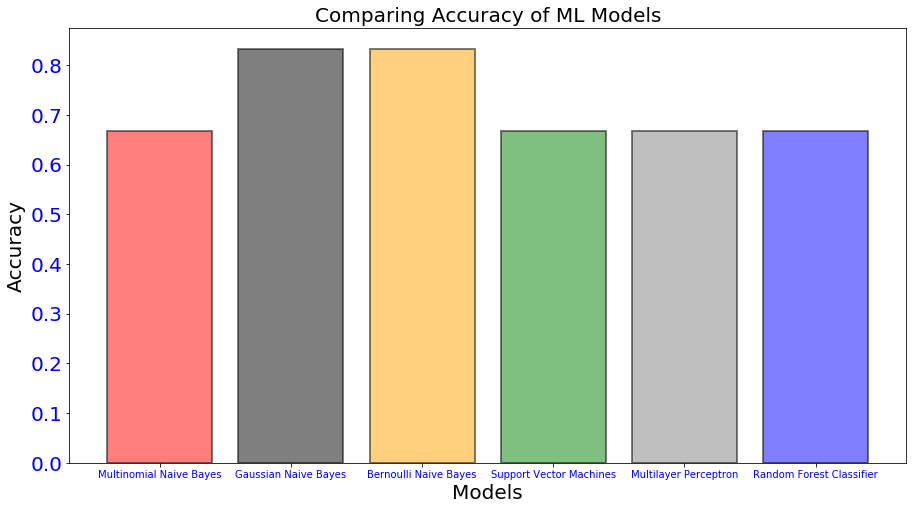

In [118]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','black','orange','green','grey','blue']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(acc_labels.keys(),acc_labels.values(), edgecolor='black', color=colors, linewidth=2,alpha=0.5)

<BarContainer object of 6 artists>

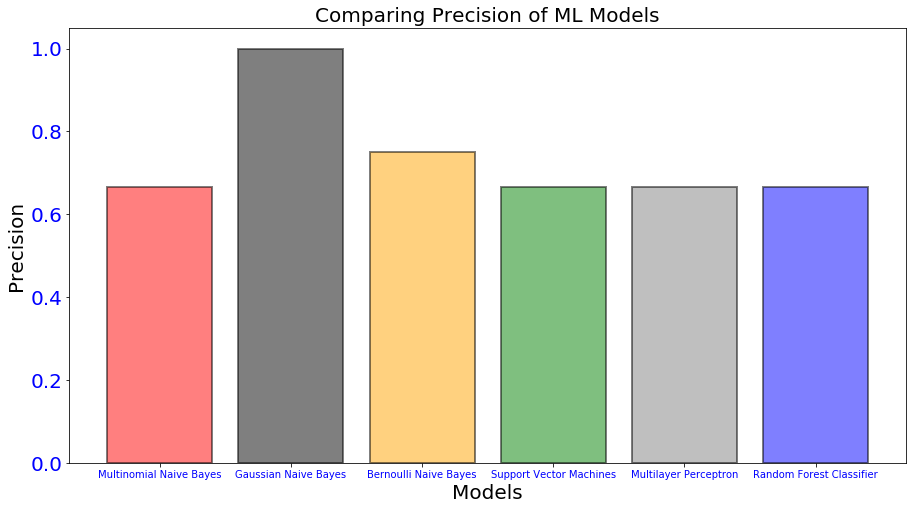

In [119]:
plt.figure(figsize=(15,8))
plt.title('Comparing Precision of ML Models',fontsize=20)
colors=['red','black','orange','green','grey','blue']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Precision',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(precision_labels.keys(),precision_labels.values(), edgecolor='black', color=colors, linewidth=2,alpha=0.5)

<BarContainer object of 6 artists>

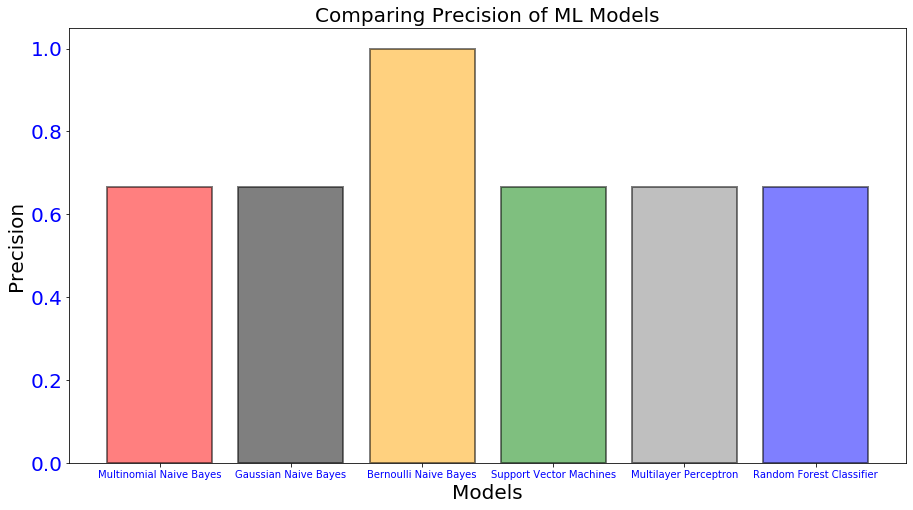

In [120]:
plt.figure(figsize=(15,8))
plt.title('Comparing Precision of ML Models',fontsize=20)
colors=['red','black','orange','green','grey','blue']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Precision',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(recall_labels.keys(),recall_labels.values(), edgecolor='black', color=colors, linewidth=2,alpha=0.5)

Since this data set is well balanced, accuracy can be perceived as a reliable metric.